In [7]:
import pandas as pd
import requests 

get = "GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F"

key = 'fd8c137d32e065e499223dba1534a3c5e7a52b91'

geography = 'state'

url = (f"https://api.census.gov/data/2018/abscbo?get={get}" +

        f"&for={geography}:" +

        f"*&key={key}")



r = requests.get(url)

data = r.text



owners = pd.read_json(data)



owners.columns = owners.iloc[0]

owners = owners[1:]
pd.set_option('display.max_columns', None)


get1 = "GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,RCPSZFI_LABEL,RCPSZFI,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F"

key = 'fd8c137d32e065e499223dba1534a3c5e7a52b91'

geography1 = 'us'

url1 = (f"https://api.census.gov/data/2018/abscs?get={get1}" +

        f"&for={geography1}:" +

        f"*&key={key}")



r1 = requests.get(url1)

data1 = r1.text



companies = pd.read_json(data1)



companies.columns = companies.iloc[0]

companies = companies[1:]
pd.set_option('display.max_columns', None)


owners.to_csv("ownersT1.csv")
companies.to_csv("companiesT1.csv")

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
owners = pd.read_csv('ownersT1.csv', low_memory = False)
companies = pd.read_csv('companiesT1.csv')

companies_clean = companies.drop(columns=["Unnamed: 0", "GEO_ID", "NAICS2017","SEX","ETH_GROUP", "RACE_GROUP", "VET_GROUP", "EMPSZFI","FIRMPDEMP_F", "FIRMPDEMP_F", "RCPPDEMP_F", "EMP_F", "PAYANN_F", "FIRMPDEMP_S_F", "RCPPDEMP_S_F", "EMP_S_F", "PAYANN_S_F"], axis=1)


owners_clean = owners.drop(columns=["Unnamed: 0", "GEO_ID", "NAICS2017","OWNER_SEX","OWNER_ETH", "OWNER_RACE", "OWNER_VET", "YEAR", "QDESC", "OWNCHAR", "OWNPDEMP_F", "OWNPDEMP_PCT_F","OWNPDEMP_S_F", "OWNPDEMP_PCT_S_F", "state"], axis=1)

owners_clean.to_csv("owners_cleanT2.csv")
companies_clean.to_csv("companies_cleanT2.csv")

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
owners_clean = pd.read_csv('owners_cleanT1.csv')
owners_clean.head()
owners_clean.shape

(5929, 13)

In [10]:
companies_clean = pd.read_csv('companies_cleanT1.csv')
companies_clean.head()
companies_clean.shape

(35944, 20)

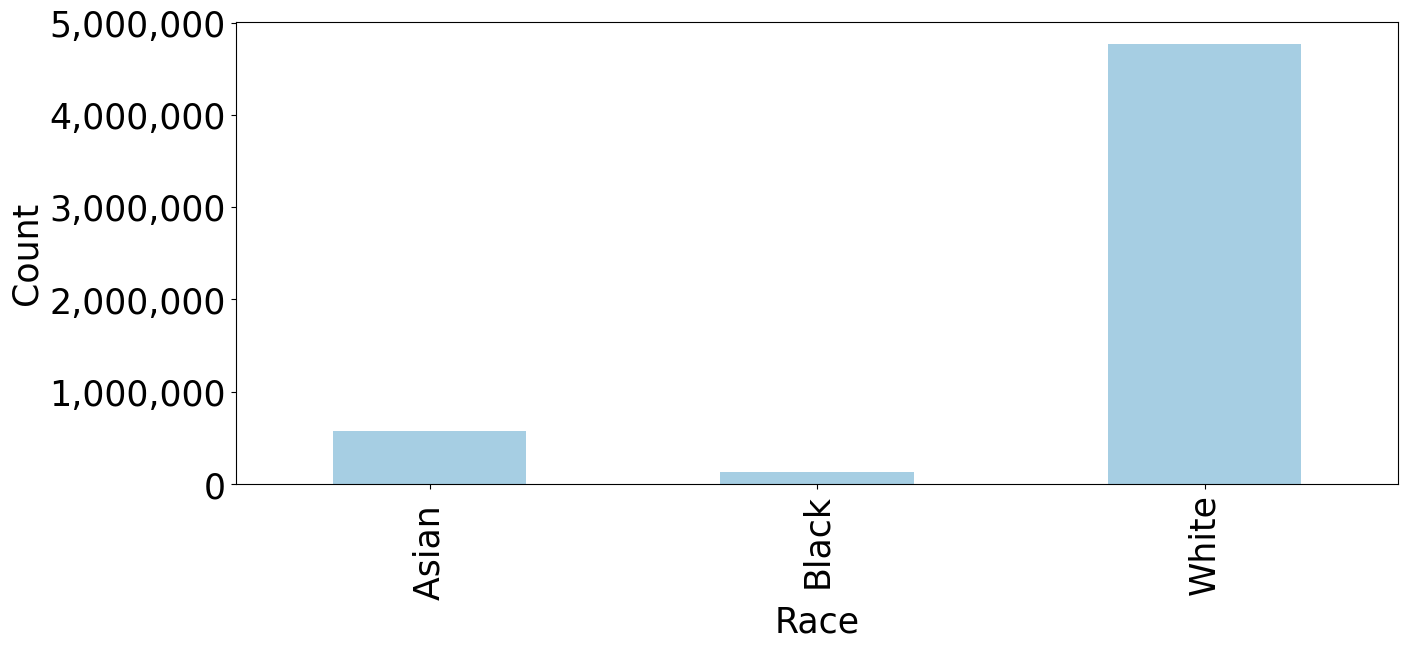

In [11]:
import seaborn as sns

from matplotlib.ticker import FuncFormatter
def add_commas(x,pos):
    return '{:,}'.format(int(x))
plt.gca().yaxis.get_major_formatter().set_scientific(False)




af = companies_clean[(companies_clean['RACE_GROUP_LABEL'] == 'White')| (companies_clean['RACE_GROUP_LABEL'] == 'Black or African American') | (companies_clean['RACE_GROUP_LABEL'] == 'Asian') ]
af = af.groupby(["RACE_GROUP_LABEL"]).agg({"FIRMPDEMP":"max"})

df = af.groupby(["RACE_GROUP_LABEL"])["FIRMPDEMP"].sum()
ax = df.plot(kind="bar", figsize=(15, 6), colormap='Paired')



# af = companies_clean[(companies_clean['RACE_GROUP_LABEL'] == 'White')| (companies_clean['RACE_GROUP_LABEL'] == 'Black or African American') | (companies_clean['RACE_GROUP_LABEL'] == 'Asian') ]
x = ["Asian ", "Black", "White"]
# az = sns.countplot(y="RACE_GROUP_LABEL", data=af)
ax.set(xlabel='Race', ylabel='Count')
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))
plt.xticks(range(len(x)), x)

plt.rcParams.update({'font.size': 25});



The visual above is displaying the distribution of races among business owners. There is a greater amount of White business owners than any other race. 

In [12]:

# big = companies[(companies['NAICS2017_LABEL'] == 'Total for all sectors') & (companies3['SEX_LABEL'] == 'Total') & (companies3['ETH_GROUP_LABEL'] == 'Total') & (companies3['RACE_GROUP_LABEL'] == 'Total') & (companies3['VET_GROUP_LABEL'] == 'Total') & (companies3['EMPSZFI_LABEL'] == 'All firms')]

# ai =big[(big['RCPSZFI_LABEL'] == 'Firms with sales/receipts of $1,000,000 or more')]



# ai2 = ai[['NAME','FIRMPDEMP']]

# ai2['FIRMPDEMP'] = ai2['FIRMPDEMP'].astype('int64')

# ai2.sort_values(by='FIRMPDEMP', inplace=True)

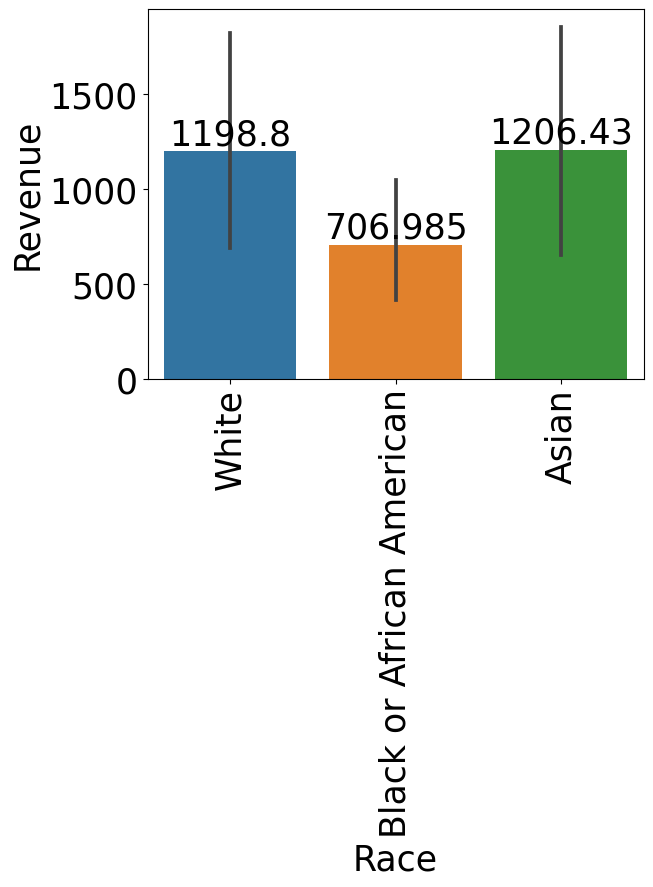

In [26]:
from matplotlib.ticker import FuncFormatter
def add_commas(x,pos):
    return '{:,}'.format(int(x))
plt.gca().yaxis.get_major_formatter().set_scientific(False)


ao = companies_clean[(companies_clean['RACE_GROUP_LABEL'] == 'White')| (companies_clean['RACE_GROUP_LABEL'] == 'Black or African American') | (companies_clean['RACE_GROUP_LABEL'] == 'Asian') ]
zi = sns.barplot(data=ao, x="RACE_GROUP_LABEL", y=(ao["RCPPDEMP"]/ao["FIRMPDEMP"]))
#box and whisker 
#run with rcpdemp
# sns.barplot( y=ao["RACE_GROUP_LABEL"], x=ao["RCPPDEMP"] );
# plt.show()

zi.set(xlabel='Race', ylabel='Revenue')
zi.bar_label(zi.containers[0], label_type='edge')
zi.set_xticklabels(zi.get_xticklabels(),rotation = 90);



The visual above is displaying the relationship between race and success of a business (measured by revenue "RCPSZFI"). Despite there being more White business owners than any other race, every group appears to be generating revenue at similar rates.

In [14]:
import requests
import pandas as pd

get3 = "GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,RCPSZFI_LABEL,RCPSZFI,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F"

key3 = 'fd8c137d32e065e499223dba1534a3c5e7a52b91'

geography3 = 'state'

url3 = (f"https://api.census.gov/data/2018/abscs?get={get3}" +

        f"&for={geography3}:" +

        f"*&key={key3}")



r3 = requests.get(url3)

data3 = r3.text



companies3 = pd.read_json(data3)



companies3.columns = companies3.iloc[0]

companies3 = companies3[1:]
pd.set_option('display.max_columns', None)



companies3.to_csv("companiesT3.csv")

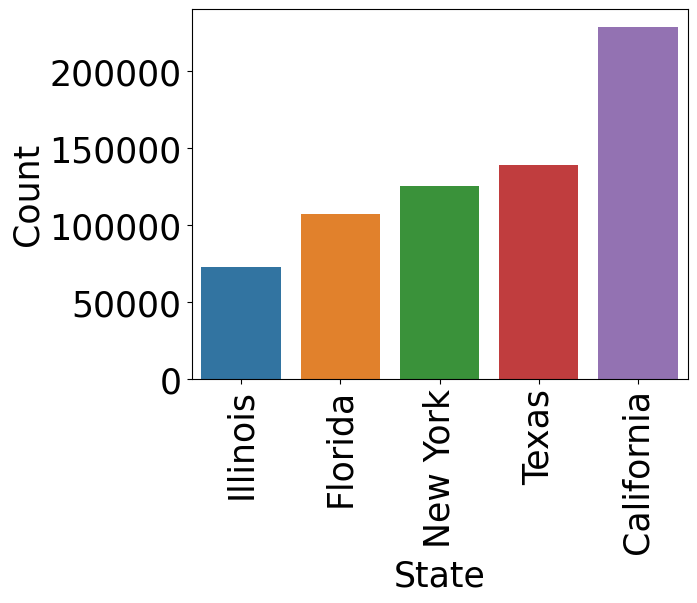

In [21]:


big = companies3[(companies3['NAICS2017_LABEL'] == 'Total for all sectors') & (companies3['SEX_LABEL'] == 'Total') & (companies3['ETH_GROUP_LABEL'] == 'Total') & (companies3['RACE_GROUP_LABEL'] == 'Total') & (companies3['VET_GROUP_LABEL'] == 'Total') & (companies3['EMPSZFI_LABEL'] == 'All firms')]

ai =big[(big['RCPSZFI_LABEL'] == 'Firms with sales/receipts of $1,000,000 or more')]



ai2 = ai[['NAME','FIRMPDEMP']]

ai2['FIRMPDEMP'] = ai2['FIRMPDEMP'].astype('int64')

ai2.sort_values(by='FIRMPDEMP', inplace=True)

wo = sns.barplot(x="NAME", y="FIRMPDEMP", data=ai2, order=ai2.sort_values("FIRMPDEMP")["NAME"].iloc[-5:])
wo.set(xlabel='State', ylabel='Count')
wo.set_xticklabels(wo.get_xticklabels(),rotation = 90);





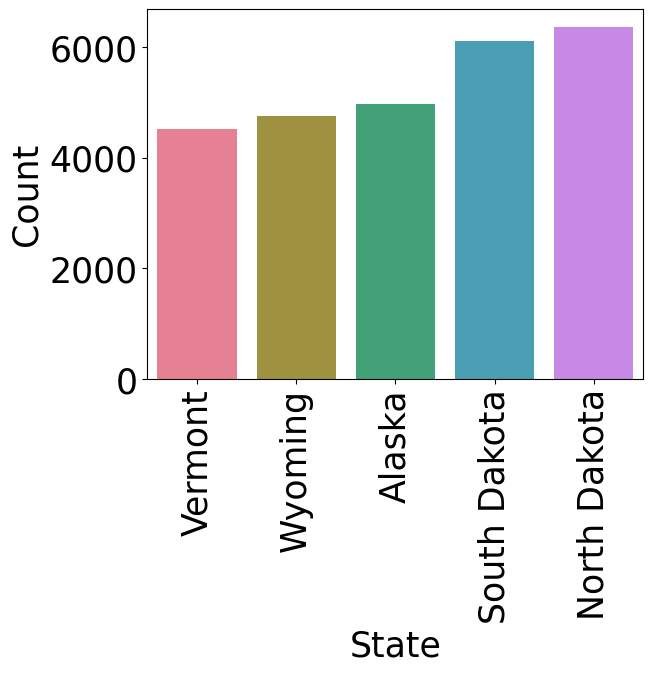

In [22]:
big = companies3[(companies3['NAICS2017_LABEL'] == 'Total for all sectors') & (companies3['SEX_LABEL'] == 'Total') & (companies3['ETH_GROUP_LABEL'] == 'Total') & (companies3['RACE_GROUP_LABEL'] == 'Total') & (companies3['VET_GROUP_LABEL'] == 'Total') & (companies3['EMPSZFI_LABEL'] == 'All firms')]

ai =big[(big['RCPSZFI_LABEL'] == 'Firms with sales/receipts of $1,000,000 or more')]



ai2 = ai[['NAME','FIRMPDEMP']]

ai2['FIRMPDEMP'] = ai2['FIRMPDEMP'].astype('int64')

ai2.sort_values(by='FIRMPDEMP', inplace=True)

wo = sns.barplot(x="NAME", y="FIRMPDEMP", data=ai2,palette="husl", order=ai2.sort_values("FIRMPDEMP")["NAME"].iloc[:5])
wo.set(xlabel='State', ylabel='Count')
wo.set_xticklabels(wo.get_xticklabels(),rotation = 90);

The visual above is displaying the top 5 states with the most high value sales.

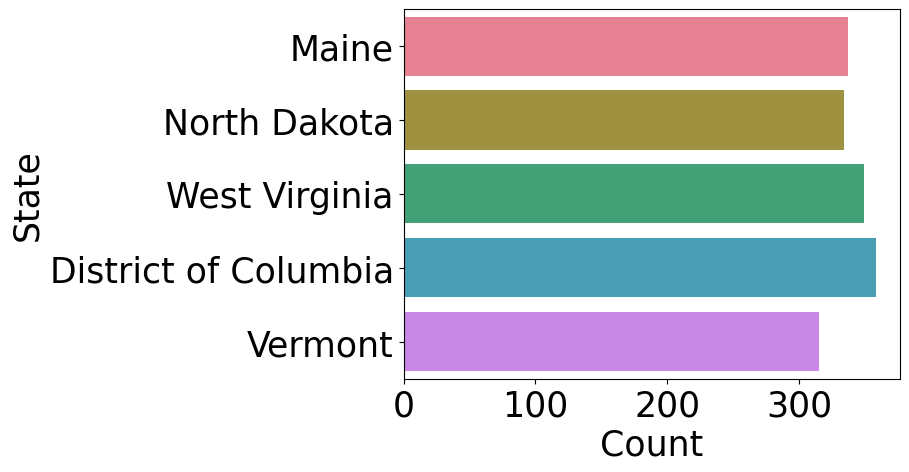

In [17]:
ai = companies3[(companies3['RCPSZFI_LABEL'] == 'Firms with sales/receipts of $1,000,000 or more')]
li = sns.countplot(y="NAME", data=ai, palette="husl",
              order=companies3.NAME.value_counts().iloc[-5:].index)
li.set(xlabel='Count', ylabel='State');
#sort values

The visual above is displaying the bottom 5 states with the least amount of high value sales.